# Paso 1: Cargar los Datos

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Leer el archivo CSV
file_path = 'online_retail.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura del dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Paso 2: Limpiar y Preprocesar los Datos

In [6]:
# Convertir 'InvoiceDate' a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Rellenar valores nulos en 'CustomerID' con -1 y convertir a entero
df['CustomerID'] = df['CustomerID'].fillna(-1).astype(int)

# Crear la columna 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Eliminar filas con cantidades negativas (devoluciones)
df = df[df['Quantity'] > 0]

# Mostrar información del dataframe para verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   531285 non-null  int64         
 7   Country      531285 non-null  object        
 8   TotalPrice   531285 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.5+ MB


# Paso 3: Crear Nuevas Columnas

In [8]:
# Convertir 'InvoiceDate' a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Rellenar valores nulos en 'CustomerID' con -1 y convertir a entero
df['CustomerID'] = df['CustomerID'].fillna(-1).astype(int)

# Crear la columna 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Eliminar filas con cantidades negativas (devoluciones)
df = df[df['Quantity'] > 0]

# Mostrar información del dataframe para verificar cambios
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   531285 non-null  int64         
 7   Country      531285 non-null  object        
 8   TotalPrice   531285 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.5+ MB


# Paso 4: Análisis Descriptivo

In [9]:
# Crear columna 'YearMonth'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Crear columna 'DayOfWeek' para el análisis por día de la semana
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Crear columna 'Hour' para el análisis por hora del día
df['Hour'] = df['InvoiceDate'].dt.hour

# Verificar las nuevas columnas
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8


# Paso 4: Análisis Descriptivo

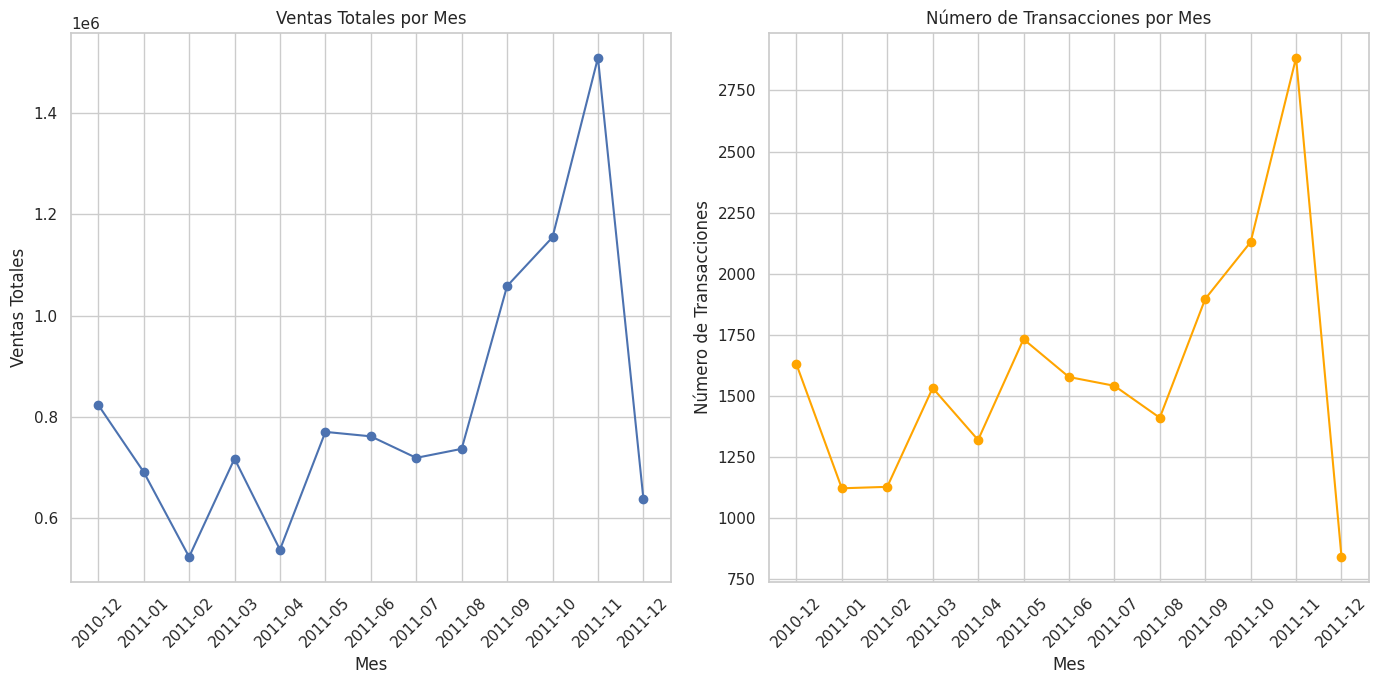

In [10]:
# Descripción estadística del dataset
df.describe()

# Cantidad de transacciones y ventas totales por año y mes
sales_by_month = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
transactions_by_month = df.groupby('YearMonth')['InvoiceNo'].nunique().reset_index()

# Mostrar las ventas y transacciones por mes
sales_by_month.head()
transactions_by_month.head()

# Visualización de ventas y transacciones por mes
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sales_by_month['YearMonth'].astype(str), sales_by_month['TotalPrice'], marker='o')
plt.xticks(rotation=45)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')

plt.subplot(1, 2, 2)
plt.plot(transactions_by_month['YearMonth'].astype(str), transactions_by_month['InvoiceNo'], marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Número de Transacciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')

plt.tight_layout()
plt.show()


# Paso 5: Análisis por País

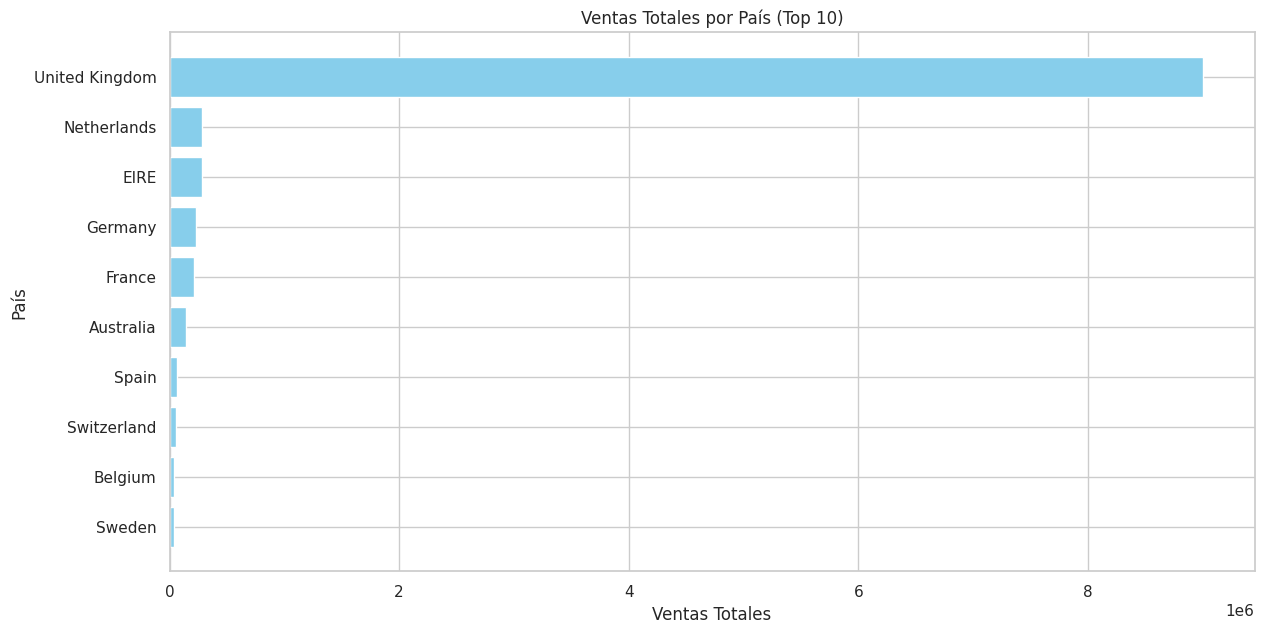

In [11]:
# Ventas totales por país
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Número de productos distintos vendidos por país
unique_products_by_country = df.groupby('Country')['StockCode'].nunique().reset_index()

# Mostrar las ventas y productos por país
sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False)
unique_products_by_country = unique_products_by_country.sort_values(by='StockCode', ascending=False)

sales_by_country.head()
unique_products_by_country.head()

# Visualización de ventas por país (Top 10)
plt.figure(figsize=(14, 7))
plt.barh(sales_by_country['Country'].head(10), sales_by_country['TotalPrice'].head(10), color='skyblue')
plt.title('Ventas Totales por País (Top 10)')
plt.xlabel('Ventas Totales')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.show()


# Paso 6: Análisis por Cliente

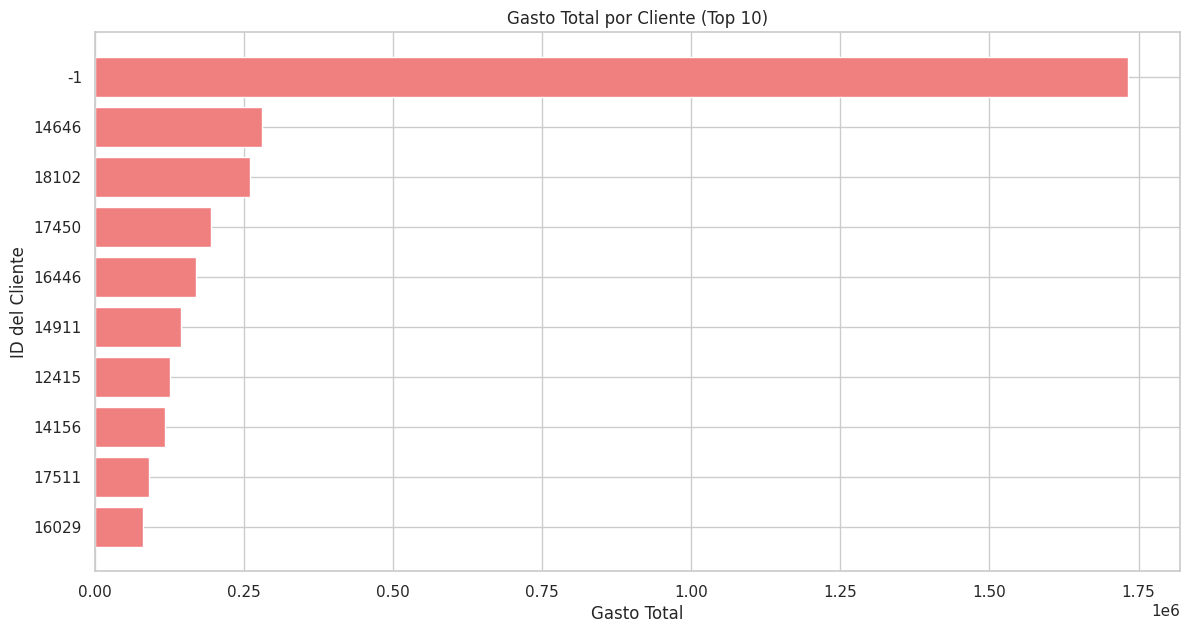

In [12]:
# Número de transacciones por cliente
transactions_by_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Gasto total por cliente
spending_by_customer = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Mostrar las transacciones y gasto por cliente (Top 10)
transactions_by_customer = transactions_by_customer.sort_values(by='InvoiceNo', ascending=False)
spending_by_customer = spending_by_customer.sort_values(by='TotalPrice', ascending=False)

transactions_by_customer.head()
spending_by_customer.head()

# Visualización de gasto por cliente (Top 10)
plt.figure(figsize=(14, 7))
plt.barh(spending_by_customer['CustomerID'].head(10).astype(str), spending_by_customer['TotalPrice'].head(10), color='lightcoral')
plt.title('Gasto Total por Cliente (Top 10)')
plt.xlabel('Gasto Total')
plt.ylabel('ID del Cliente')
plt.gca().invert_yaxis()
plt.show()


# Paso 7: Análisis por Hora y Día de la Semana

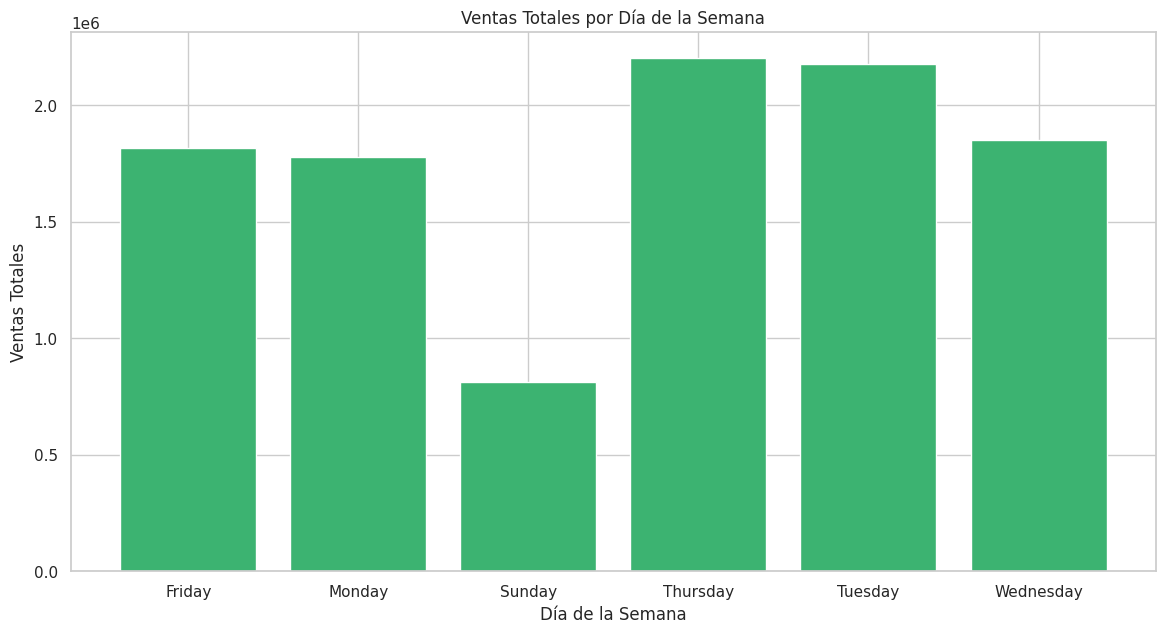

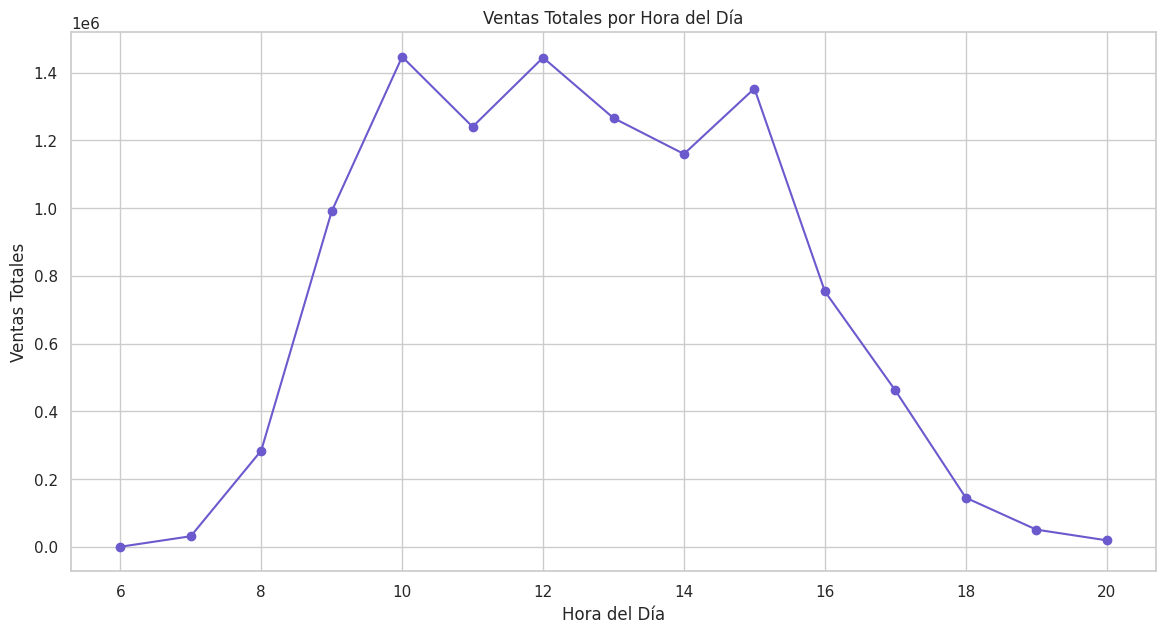

In [13]:
# Ventas totales por día de la semana
sales_by_day_of_week = df.groupby('DayOfWeek')['TotalPrice'].sum().reset_index()

# Ventas totales por hora del día
sales_by_hour = df.groupby('Hour')['TotalPrice'].sum().reset_index()

# Visualización de ventas por día de la semana
plt.figure(figsize=(14, 7))
plt.bar(sales_by_day_of_week['DayOfWeek'], sales_by_day_of_week['TotalPrice'], color='mediumseagreen')
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.show()

# Visualización de ventas por hora del día
plt.figure(figsize=(14, 7))
plt.plot(sales_by_hour['Hour'], sales_by_hour['TotalPrice'], marker='o', color='slateblue')
plt.title('Ventas Totales por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()


# Paso 7: Insigths

In [14]:
# Máximo y mínimo de ventas por país
max_sales_country = sales_by_country.iloc[0]
min_sales_country = sales_by_country.iloc[-1]

print("País con las ventas totales más altas:")
print(max_sales_country)
print("\nPaís con las ventas totales más bajas:")
print(min_sales_country)

País con las ventas totales más altas:
Country       United Kingdom
TotalPrice       9003097.964
Name: 36, dtype: object

País con las ventas totales más bajas:
Country       Saudi Arabia
TotalPrice          145.92
Name: 29, dtype: object


In [15]:
# Máximo y mínimo de gasto por cliente
max_spending_customer = spending_by_customer.iloc[0]
min_spending_customer = spending_by_customer.iloc[-1]

print("\nCliente con el gasto total más alto:")
print(max_spending_customer)
print("\nCliente con el gasto total más bajo:")
print(min_spending_customer)


Cliente con el gasto total más alto:
CustomerID         -1.00
TotalPrice    1733152.52
Name: 0, dtype: float64

Cliente con el gasto total más bajo:
CustomerID    13256.0
TotalPrice        0.0
Name: 686, dtype: float64


In [16]:
# Máximo y mínimo de número de transacciones por cliente
max_transactions_customer = transactions_by_customer.iloc[0]
min_transactions_customer = transactions_by_customer.iloc[-1]

print("\nCliente con el mayor número de transacciones:")
print(max_transactions_customer)
print("\nCliente con el menor número de transacciones:")
print(min_transactions_customer)



Cliente con el mayor número de transacciones:
CustomerID      -1
InvoiceNo     2192
Name: 0, dtype: int64

Cliente con el menor número de transacciones:
CustomerID    13737
InvoiceNo         1
Name: 1031, dtype: int64


In [17]:
# Ventas totales por día de la semana
sales_by_day_of_week = df.groupby('DayOfWeek')['TotalPrice'].sum().reset_index()
max_sales_day = sales_by_day_of_week[sales_by_day_of_week['TotalPrice'] == sales_by_day_of_week['TotalPrice'].max()]
min_sales_day = sales_by_day_of_week[sales_by_day_of_week['TotalPrice'] == sales_by_day_of_week['TotalPrice'].min()]

print("\nDía de la semana con las ventas más altas:")
print(max_sales_day)
print("\nDía de la semana con las ventas más bajas:")
print(min_sales_day)


Día de la semana con las ventas más altas:
  DayOfWeek  TotalPrice
3  Thursday  2203161.24

Día de la semana con las ventas más bajas:
  DayOfWeek  TotalPrice
2    Sunday  813827.611


In [18]:
# Ventas totales por hora del día
sales_by_hour = df.groupby('Hour')['TotalPrice'].sum().reset_index()
max_sales_hour = sales_by_hour[sales_by_hour['TotalPrice'] == sales_by_hour['TotalPrice'].max()]
min_sales_hour = sales_by_hour[sales_by_hour['TotalPrice'] == sales_by_hour['TotalPrice'].min()]

print("\nHora del día con las ventas más altas:")
print(max_sales_hour)
print("\nHora del día con las ventas más bajas:")
print(min_sales_hour)


Hora del día con las ventas más altas:
   Hour   TotalPrice
4    10  1446742.701

Hora del día con las ventas más bajas:
   Hour  TotalPrice
0     6        4.25
